 # Use Random Forest to prepare a model on fraud data.  
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


## Import required lib

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [2]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Initial analysis

In [3]:
fraud_data.shape

(600, 6)

In [4]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
fraud_data[fraud_data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
fraud_data1 = fraud_data.rename(columns = {'Marital.Status':'MaritalStatus','Taxable.Income':'TaxIncome',
                                           'City.Population':'Population','Work.Experience':'Experience'})
fraud_data1.head()

,Undergrad,MaritalStatus,TaxIncome,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## use encoding techniques

In [8]:
fraud_new = pd.get_dummies(data = fraud_data1,columns = ['Undergrad','MaritalStatus','Urban'])
fraud_new

,TaxIncome,Population,Experience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [9]:
fraud_new.dtypes

TaxIncome                 int64
Population                int64
Experience                int64
Undergrad_NO              uint8
Undergrad_YES             uint8
MaritalStatus_Divorced    uint8
MaritalStatus_Married     uint8
MaritalStatus_Single      uint8
Urban_NO                  uint8
Urban_YES                 uint8
dtype: object

In [10]:
x= fraud_new.drop(labels='TaxIncome',axis = 1)
y = fraud_new[['TaxIncome']]

In [11]:
x.head()

,Population,Experience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [12]:
y.head()

,TaxIncome
0,68833
1,33700
2,36925
3,50190
4,81002


In [13]:
y['Taxincome']='Good'
y.loc[y['TaxIncome']<=30000,'Taxincome']= 'Risky'
y.drop(labels = 'TaxIncome',axis = 1,inplace = True)
y

,Taxincome
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [14]:
le = LabelEncoder()
y['Taxincome1'] = le.fit_transform(y['Taxincome'])
y.head()

,Taxincome,Taxincome1
0,Good,0
1,Good,0
2,Good,0
3,Good,0
4,Good,0


In [15]:
y.drop(labels = 'Taxincome',axis = 1,inplace=True)
y.head()

,Taxincome1
0,0
1,0
2,0
3,0
4,0


In [16]:
def minmax_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
x_norm = minmax_fun(x.iloc[:,0:])
x_norm.head()

,Population,Experience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## visualization

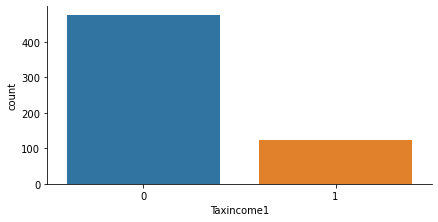

In [18]:
sns.factorplot('Taxincome1',data = y,kind = 'count',size = 3,aspect = 2)

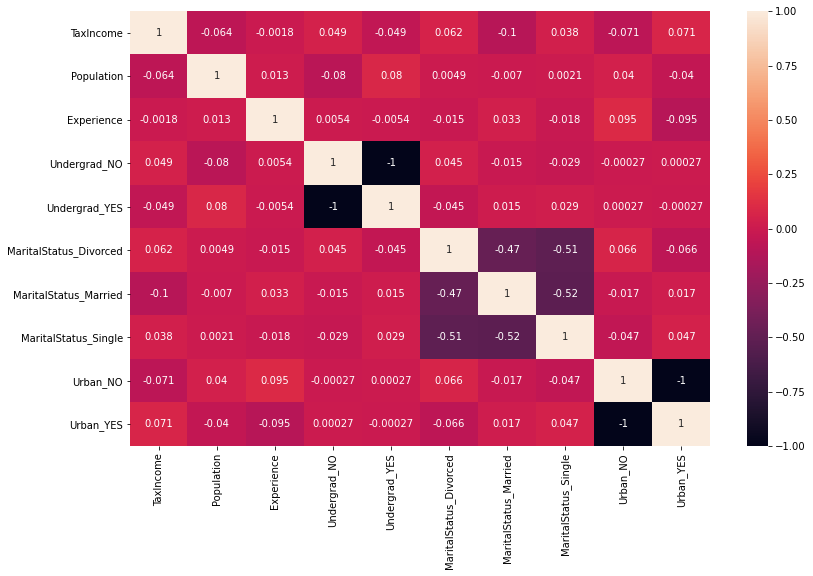

In [82]:
corr = fraud_new.corr()
plt.figure(figsize=(13,8))
sns.heatmap(corr,annot = True)
plt.show()

## Model Building

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.20,random_state=12,stratify=y)

In [20]:
x_train.shape,y_train.shape

((480, 9), (480, 1))

In [21]:
x_test.shape,y_test.shape

((120, 9), (120, 1))

## Create model

In [22]:
# random forest model
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=9,random_state=0,)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, random_state=0)

In [71]:
# training data
y_train_pred = rf_model.predict(x_train)

In [72]:
accuracy_score(y_train,y_train_pred)  
# 95.83% accurancy level 

0.9583333333333334

In [25]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       381
           1       1.00      0.80      0.89        99

    accuracy                           0.96       480
   macro avg       0.98      0.90      0.93       480
weighted avg       0.96      0.96      0.96       480



In [26]:
confusion_matrix(y_train,y_train_pred)

array([[381,   0],
       [ 20,  79]], dtype=int64)

In [27]:
# testing data
y_test_pred = rf_model.predict(x_test)   # testing data

In [28]:
accuracy_score(y_test,y_test_pred)
# 73.33% accurancy level

0.7333333333333333

In [29]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        95
           1       0.00      0.00      0.00        25

    accuracy                           0.73       120
   macro avg       0.39      0.46      0.42       120
weighted avg       0.62      0.73      0.67       120



In [30]:
confusion_matrix(y_test,y_test_pred)

array([[88,  7],
       [25,  0]], dtype=int64)

In [83]:
f1 = pd.DataFrame({'features':x_norm.columns,
                   'important':rf_model.feature_importances_,}).sort_values('important',ascending = False)
f1

,features,important
0,Population,0.507104
1,Experience,0.350111
5,MaritalStatus_Married,0.023002
3,Undergrad_YES,0.022722
8,Urban_YES,0.020453
7,Urban_NO,0.019382
4,MaritalStatus_Divorced,0.019274
2,Undergrad_NO,0.019064
6,MaritalStatus_Single,0.018888


<AxesSubplot:xlabel='important', ylabel='features'>

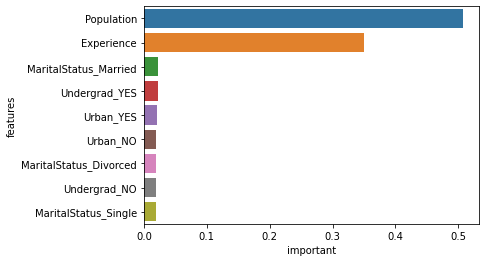

In [84]:
sns.barplot(y='features',x='important',data=f1)

## prepare second model

In [54]:
rf_model2 = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=0)
rf_model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50,
                       random_state=0)

In [55]:
y_train_pred2 = rf_model2.predict(x_train)

In [56]:
accuracy_score(y_train,y_train_pred2)  # training data
# 91.45 % accurency level

0.96875

In [57]:
confusion_matrix(y_train,y_train_pred2)

array([[381,   0],
       [ 15,  84]], dtype=int64)

In [58]:
print(classification_report(y_train,y_train_pred2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       381
           1       1.00      0.85      0.92        99

    accuracy                           0.97       480
   macro avg       0.98      0.92      0.95       480
weighted avg       0.97      0.97      0.97       480



In [59]:
 # testing data
y_test_pred2 = rf_model2.predict(x_test)  

In [60]:
accuracy_score(y_test,y_test_pred2)
# 84.16 % accurancy level

0.725

In [61]:
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        95
           1       0.10      0.04      0.06        25

    accuracy                           0.73       120
   macro avg       0.44      0.47      0.45       120
weighted avg       0.64      0.72      0.68       120



In [62]:
confusion_matrix(y_test,y_test_pred2)

array([[86,  9],
       [24,  1]], dtype=int64)

In [ ]:
# as comparing both model the correct model which gives accurency level greater is,
# random forest model
#rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=9,random_state=0)
#rf_model.fit(x_train,y_train)

In [69]:
acc_score=[]
for i in range(1,10):
    rf_model3 = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=i,random_state=0)
    rf_model3.fit(x_train,y_train)
    y_pred = rf_model3.predict(x_train)
    acc_score = accuracy_score(y_train,y_pred)
    print('accurancy score',i,acc_score)

accurancy score 1 0.79375
accurancy score 2 0.79375
accurancy score 3 0.79375
accurancy score 4 0.79375
accurancy score 5 0.79375
accurancy score 6 0.7958333333333333
accurancy score 7 0.8208333333333333
accurancy score 8 0.875
accurancy score 9 0.93125


In [68]:
acc_score=[]
for i in range(1,10):
    rf_model3 = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=i,random_state=0)
    rf_model3.fit(x_train,y_train)
    y_pred_test = rf_model3.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred_test)
    print('accurancy score',i,acc_score)

accurancy score 1 0.7916666666666666
accurancy score 2 0.7916666666666666
accurancy score 3 0.7916666666666666
accurancy score 4 0.7916666666666666
accurancy score 5 0.7916666666666666
accurancy score 6 0.7916666666666666
accurancy score 7 0.7833333333333333
accurancy score 8 0.7583333333333333
accurancy score 9 0.7416666666666667


In [70]:
rf_model3 = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=7,random_state=0)
rf_model3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=50,
                       random_state=0)

In [73]:
y_tr_pr = rf_model3.predict(x_train)

In [74]:
accuracy_score(y_train,y_tr_pr)

0.8208333333333333

In [77]:
confusion_matrix(y_train,y_tr_pr)

array([[381,   0],
       [ 86,  13]], dtype=int64)

In [75]:
y_te_pr = rf_model3.predict(x_test)

In [76]:
accuracy_score(y_test,y_te_pr)

0.7833333333333333

In [78]:
confusion_matrix(y_test,y_te_pr)

array([[94,  1],
       [25,  0]], dtype=int64)